In [1]:
!pip install langgraph langsmith


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
groq_api_key=''
langsmith=''
print(langsmith)

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


In [3]:
import os
os.environ["LANGHAIN_API_KEY"]=langsmith
os.environ["LANGCHAIN_TRACKING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]="CourseLanggarph"

In [16]:
 # Use a hyphen instead of underscore in the package name
from langchain_groq import ChatGroq 

In [17]:
llm=ChatGroq(groq_api_key=groq_api_key,model_name="gemma2-9b-it")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x00000222A856C970>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x00000222A736A670>, model_name='gemma2-9b-it', groq_api_key=SecretStr('**********'))

In [18]:
!pip install langgraph
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
class State(TypedDict):
    messages:Annotated[list,add_messages]
graph_builder=StateGraph(State)

In [20]:
graph_builder

In [21]:
def chatbot(state:State):
    return{"messages":llm.invoke(state['messages'])}

In [22]:
graph_builder.add_node("chatbot",chatbot)

In [23]:
graph_builder

In [24]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [25]:
graph=graph_builder.compile()

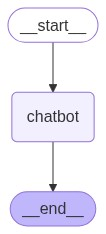

In [26]:
from IPython.display import Image,display
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [27]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "q"]:
        print("Good Bye")
        break
def stream_chat_response(user_input):   

    for event in graph.stream({'messages': ("user", user_input)}):
        for value in event.values():
            # Ensure 'messages' exists and is a list or a single AIMessage object
            message = value.get("messages")
            if hasattr(message, "content"):  # If it's an AIMessage object
                print("Assistant:", message.content.strip())
            elif isinstance(message, list):
                for msg in message:
                    if hasattr(msg, "content"):
                        print("Assistant:", msg.content.strip())


Good Bye
